In [53]:
import pandas as pd

In [97]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [98]:
df.dropna(inplace=True)

duplicate_columns = ['UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']

# Drop duplicates based on the specified columns, keeping the first occurrence
df = df.drop_duplicates(subset=duplicate_columns, keep='first')

# Display the first few rows of the cleaned DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


To eliminate redundancy in this dataset, I first loaded the dataset into a pandas DataFrame. I then dropped all the null values and sorted the data by the 'ProductId' column to group similar reviews together. To identify duplicate reviews, we specified key columns including 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', and 'Text'. By removing duplicates based on these columns, I ensured that only the first occurrence of each set of identical reviews was kept. This method reduces redundancy effectively, retaining only one representative review for products with different 'ProductId' but identical other parameters.

# **Data Pre-processing**

In [99]:
df.shape

(396249, 10)

This dataset has 396268 rows and 10 columns.

However, I choose to have a dataset of 500 rows to limit the size of this dataset for faster processing.

In [101]:
df = df.head(500)

# **Exploratory Data Analysis (EDA)**

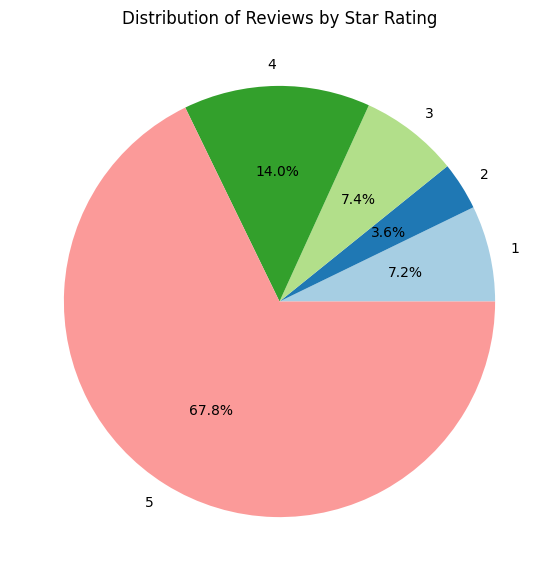

In [102]:
import matplotlib.pyplot as plt

score_counts = df['Score'].value_counts().sort_index()

ax = score_counts.plot(kind='pie',
                       title='Distribution of Reviews by Star Rating',
                       figsize=(10, 7),
                       autopct='%1.1f%%',
                       colors=plt.cm.Paired.colors)
ax.set_ylabel('')
plt.show()


This indicates that the majority of the reviews are positive, with only a small number being negative.

# **Sentiment Analysis**

How basic NLTK Sentiment Analysis works

In [103]:
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aurelie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aurelie/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aurelie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aurelie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

*  We first begin by selecting a single review from the 500 reviews that will be analyzed as a sample.



In [104]:
example = df['Text'][100]
print(example)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


This code outputs the review text found in the 'Text' column at index 100 of the DataFrame reviews_df.

**Tokenization**

Machines cannot comprehend language in its original form, thus language processing is necessary to make language more machine-understandable.

*   We tokenize the content by splitting the strings into smaller parts called tokens, and slicing it for faster processing. Tokenization is the process of breaking down a text into individual words or tokens.



In [105]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'mouth', 'says', ',', '``', 'How', 'do', 'I', 'love', 'thee']

**POS tagging**
*   We then have Part-of-speech (POS) tagging, which is used to assign a part-of-speech tag to each tokenized word in the sample.



In [106]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN')]

**Name Entity Recognition**

*   Finally, we apply Named Entity Recognition (NER), a process that identifies and classifies named entities within the text. This step is crucial as it allows us to extract specific entities like people, organizations, locations, and dates from the text data. These entities hold significant meaning and context, and extracting them can yield valuable insights for various natural language processing tasks, including information extraction, question answering, and constructing knowledge graphs.

In [107]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


# **VADER Sentiment Scoring Model**

We will utilize NLTK's SentimentIntensityAnalyzer to obtain the negative, neutral, and positive scores for text.

This approach employs a "bag of words" method:
*   Stop words are removed.
*   Each word is scored individually, and these scores are aggregated into a total score.




In [126]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [127]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 1374.03it/s]


This code snippet processes each row in the DataFrame reviews_df by extracting the text content of each review and performing sentiment analysis using the SentimentIntensityAnalyzer (sia). It then saves the sentiment scores for each review in a dictionary called res, with the review ID (from the 'Id' column) as the key.

In [128]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [129]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In VADER (Valence Aware Dictionary and sEntiment Reasoner), the terms neg, pos, and neu represent different aspects of sentiment in a piece of text. These aspects are determined by the intensity of negative, positive, and neutral sentiments present in the text.

**neg (Negative Score)**: This score indicates the proportion of negative sentiment in the text, reflecting the degree to which the text expresses negative emotions like anger, sadness, or frustration. The value ranges from 0 to 1, with higher values indicating more negativity.

**pos (Positive Score)**: This score indicates the proportion of positive sentiment in the text, reflecting the degree to which the text expresses positive emotions like happiness, joy, or satisfaction. The value ranges from 0 to 1, with higher values indicating more positivity.

**neu (Neutral Score)**: This score indicates the proportion of neutral sentiment in the text, reflecting the degree to which the text is neutral or lacks strong emotional polarity. Higher values suggest more neutral language and less emotional content. The value ranges from 0 to 1, similar to neg and pos.

The compound score is a single value that represents the **overall** sentiment polarity of a piece of text. It accounts for both positive and negative sentiment scores and their intensities to provide a comprehensive assessment of the text's sentiment. The compound score ranges from -1 to 1.

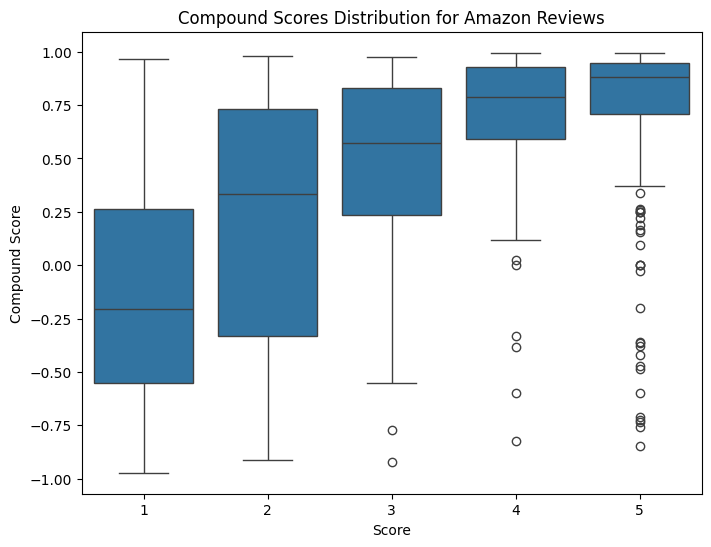

In [130]:
import seaborn as sns

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=vaders, x='Score', y='compound')
plt.title('Compound Scores Distribution for Amazon Reviews')
plt.xlabel('Score')
plt.ylabel('Compound Score')
plt.show()

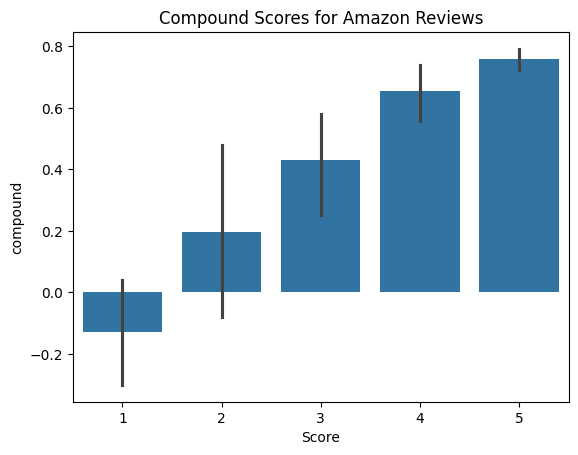

In [131]:
# Create a bar plot using seaborn
ax = sns.barplot(data=vaders, x='Score', y='compound')
# Set the title of the plot
ax.set_title('Compound Scores for Amazon Reviews')

# Display the plot
plt.show()


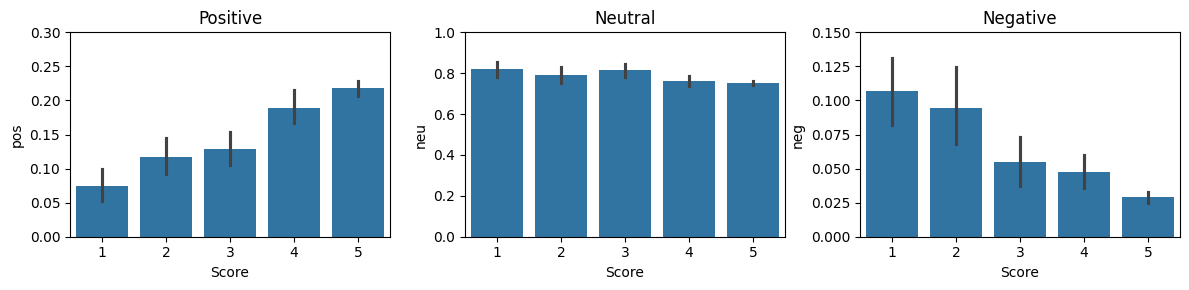

In [132]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Create bar plots for positive, neutral, and negative scores
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_ylim(0, 0.3)  # Set y-axis limits for the first subplot
axs[1].set_ylim(0, 1)    # Set y-axis limits for the second subplot
axs[2].set_ylim(0, 0.15)

# Set titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



This snippet of code generates a subplot containing three bar plots that illustrate how positive, neutral, and negative sentiment scores are distributed across various review ratings.

# **RoBERT Pretrained Model**

*   Leverage a model that has been trained on a substantial dataset.
*   The transformer model considers not only individual words but also their contextual relationships with other words.




In [115]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [116]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/aurelie/Desktop/Projects/Amazon Reviews/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [117]:
def polarity_scores_roberta(example):
    # Encode the text using the tokenizer
    encoded_text = tokenizer(example, return_tensors='pt')

    # Get the model output
    output = model(**encoded_text)

    # Extract the scores from the output
    scores = output[0][0].detach().numpy()

    # Apply softmax to the scores
    scores = softmax(scores)

    # Create a dictionary with the sentiment scores
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [118]:
# Initialize result dictionary
res = {}

# Iterate over each row in the DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Extract the text and id from the row
        text = row['Text']
        myid = row['Id']

        # Perform Roberta sentiment analysis
        roberta_result = polarity_scores_roberta(text)

        # Store the results in the dictionary with the review ID as the key
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id {myid}')



 17%|█▋        | 83/500 [00:11<00:41, 10.10it/s]

Broke for id 83


 37%|███▋      | 187/500 [00:24<00:33,  9.38it/s]

Broke for id 187


100%|██████████| 500/500 [01:07<00:00,  7.40it/s]


In [119]:
roberta_df = pd.DataFrame.from_dict(res, orient='index')
roberta_df.head()

,roberta_neg,roberta_neu,roberta_pos
1,0.009624,0.049980,0.940395
2,0.508986,0.452414,0.038600
3,0.003229,0.098067,0.898704
4,0.002295,0.090219,0.907486
5,0.001635,0.010302,0.988063


There could be a number of reasons why sentiment analysis for a certain ID yielded an error:

*Problems with data quality*: The sentiment analysis process may have failed due to unusual characters, encoding errors, or erratic formatting in the text data for those particular IDs.

*Limitations of the Model*: The sentiment analysis model employed here may not be able to handle all text data formats or may have issues with particular linguistic patterns or styles.

In [120]:
vaders = vaders[['Id', 'neg', 'neu', 'pos']].rename(columns={
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos'
})

print(vaders.head())


VADER Results with Renamed Columns:
   Id  vader_neg  vader_neu  vader_pos
0   1      0.000      0.695      0.305
1   2      0.138      0.862      0.000
2   3      0.091      0.754      0.155
3   4      0.000      1.000      0.000
4   5      0.000      0.552      0.448


In [123]:
# Convert the RoBERTa results to a DataFrame
roberta_df = pd.DataFrame.from_dict(res, orient='index').reset_index().rename(columns={'index': 'Id'})

# Merge VADER results with the original DataFrame
merged_df = df.merge(vaders, on='Id', how='left')

# Merge RoBERTa results with the merged DataFrame
final_df = merged_df.merge(roberta_df, on='Id', how='left')

# Display the first few rows of the final DataFrame
print("Merged DataFrame with VADER and RoBERTa Results:")
print(final_df.head())

Merged DataFrame with VADER and RoBERTa Results:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I ha

# Comparing Neg, Neu And Pos Values Between Models 

In order to show the relationship between the sentiment scores predicted by VADER and the RoBERTa model in relation to the review scores, this code creates a pair plot using Seaborn's pairplot function.

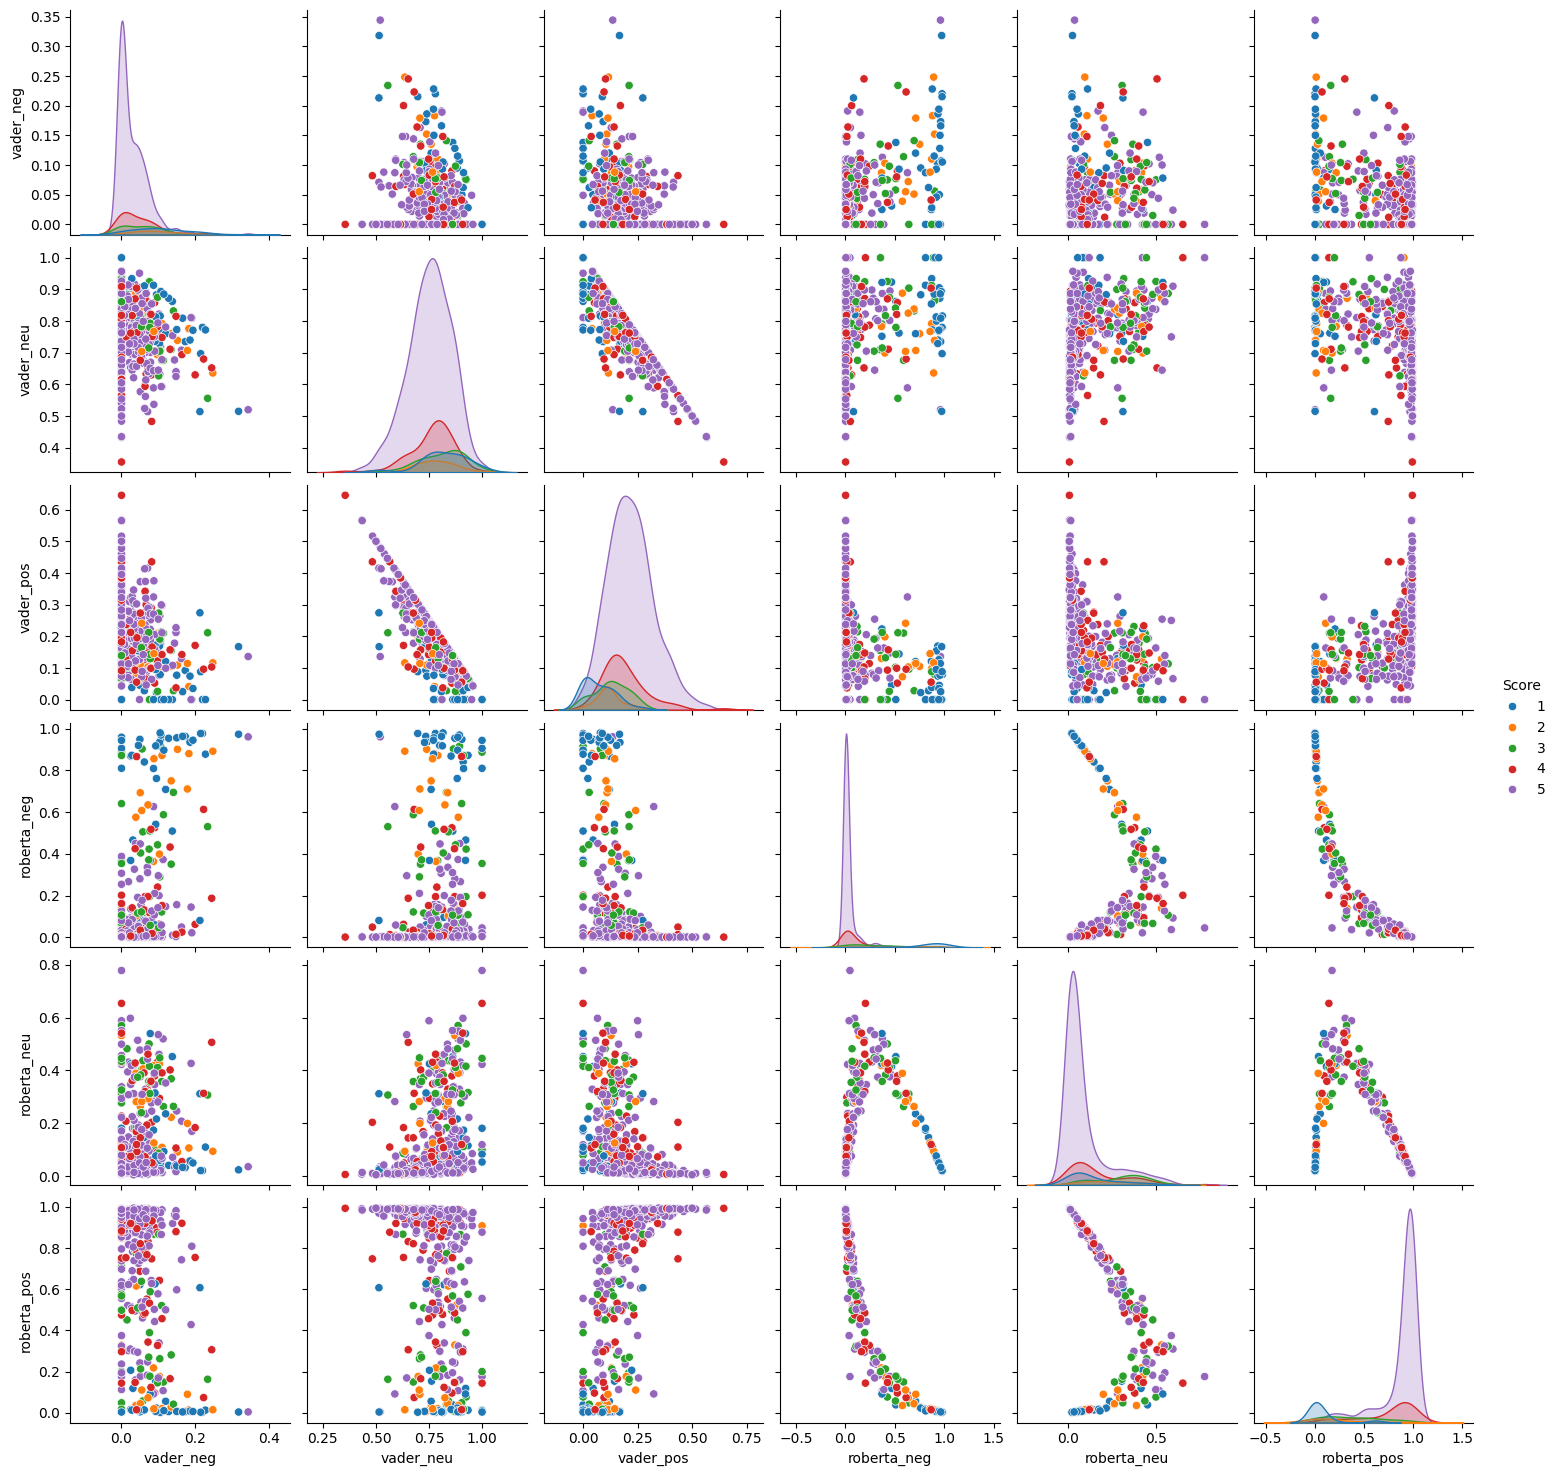

In [125]:
sns.pairplot(data=final_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

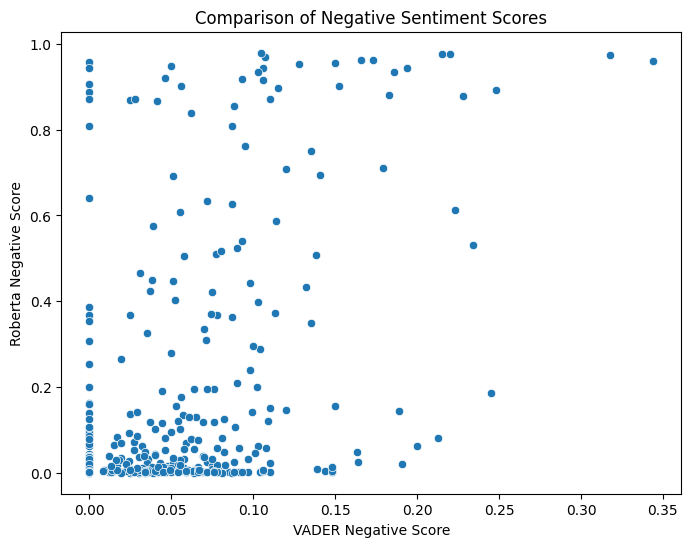

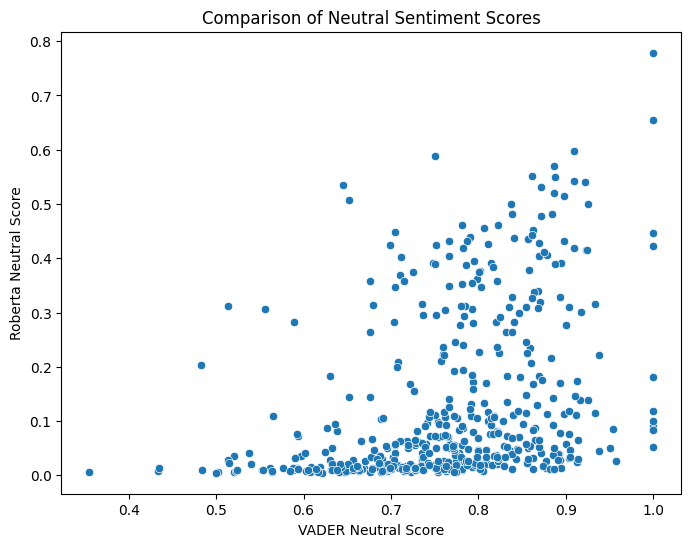

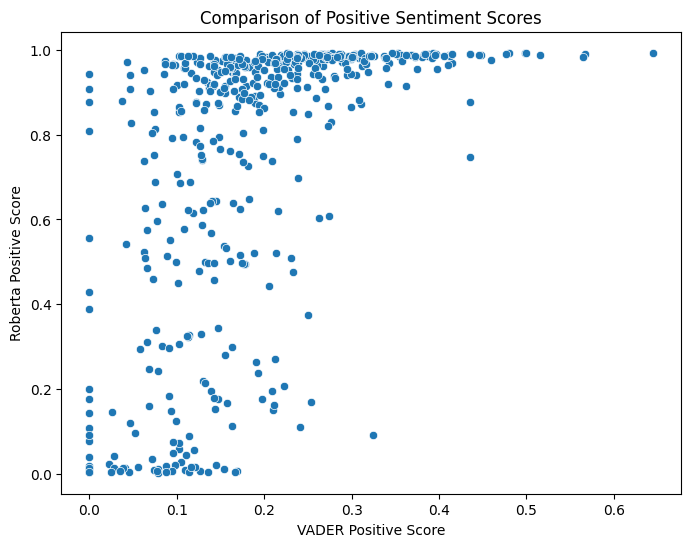

In [133]:
# Scatter plot for negative scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_neg', y='roberta_neg', data=final_df)
plt.title('Comparison of Negative Sentiment Scores')
plt.xlabel('VADER Negative Score')
plt.ylabel('Roberta Negative Score')
plt.show()

# Scatter plot for neutral scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_neu', y='roberta_neu', data=final_df)
plt.title('Comparison of Neutral Sentiment Scores')
plt.xlabel('VADER Neutral Score')
plt.ylabel('Roberta Neutral Score')
plt.show()

# Scatter plot for positive scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_pos', y='roberta_pos', data=final_df)
plt.title('Comparison of Positive Sentiment Scores')
plt.xlabel('VADER Positive Score')
plt.ylabel('Roberta Positive Score')
plt.show()